<a href="https://colab.research.google.com/github/aguspray001/Deep-Recommendation-System/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA and Insight**

In [2]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
olist_customers = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/olist_customers_dataset.csv")
olist_order_items = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/olist_order_items_dataset.csv")
olist_order_payments = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/olist_order_payments_dataset.csv")
olist_order_reviews = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/olist_order_reviews_dataset.csv")
olist_orders = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/olist_orders_dataset.csv")
olist_products = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/olist_products_dataset.csv")
olist_sellers = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/olist_sellers_dataset.csv")
product_category_name = pd.read_csv("/content/drive/Shared drives/DS Workshop/Datasets/Origin/product_category_name_translation.csv")

**Handling null values**

In [5]:
review_item_merge = olist_order_reviews.merge(olist_order_items, on= "order_id", how = "outer")

In [6]:
review_item_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114100 entries, 0 to 114099
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                114100 non-null  object 
 1   order_id                 114100 non-null  object 
 2   review_score             114100 non-null  int64  
 3   review_comment_title     13714 non-null   object 
 4   review_comment_message   49135 non-null   object 
 5   review_creation_date     114100 non-null  object 
 6   review_answer_timestamp  114100 non-null  object 
 7   order_item_id            113322 non-null  float64
 8   product_id               113322 non-null  object 
 9   seller_id                113322 non-null  object 
 10  shipping_limit_date      113322 non-null  object 
 11  price                    113322 non-null  float64
 12  freight_value            113322 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 12.2+ MB


In [7]:
price_median = review_item_merge["price"].median()
price_median

74.9

In [8]:
review_item_merge["price"] = review_item_merge["price"].fillna(price_median)

In [9]:
review_item_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114100 entries, 0 to 114099
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                114100 non-null  object 
 1   order_id                 114100 non-null  object 
 2   review_score             114100 non-null  int64  
 3   review_comment_title     13714 non-null   object 
 4   review_comment_message   49135 non-null   object 
 5   review_creation_date     114100 non-null  object 
 6   review_answer_timestamp  114100 non-null  object 
 7   order_item_id            113322 non-null  float64
 8   product_id               113322 non-null  object 
 9   seller_id                113322 non-null  object 
 10  shipping_limit_date      113322 non-null  object 
 11  price                    114100 non-null  float64
 12  freight_value            113322 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 12.2+ MB


# **Check dropshiper**

In [13]:
order_item_merge  = olist_order_items.merge(olist_orders, on = "order_id" , how = "inner")
order_item_customers_merge = order_item_merge.merge(olist_customers, on = "customer_id", how = "inner")
order_item_customers_merge.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [14]:
order_item_merge_grouped = order_item_customers_merge.groupby(["customer_unique_id", "order_id"]).count()

In [15]:
order_item_merge_grouped.head()

,,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,order_id,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


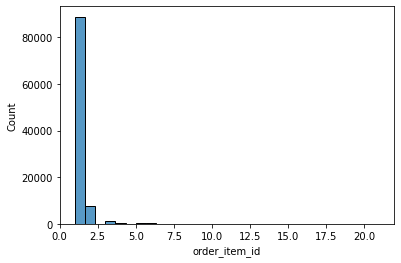

In [18]:
sns.histplot(order_item_merge_grouped["order_item_id"], bins=30)

Dari grafik di atas, diketahui bahwa grafik histogram menjulur ke kanan (distribution right skewed), hal ini menandakan ada yang membeli product lebih dari 1, bahkan hingga angka 20. kemungkinan ini mengindikasikan adanya dropshipper

Untuk menguji dropshipper, maka dibuatlah threshold jumlah product yg dibeli, apabila sesorang melebihi atau sama dengan jumlah threshold, maka ia adalah dropshipper.

In [19]:
order_item_merge_grouped["product_id"].quantile([0, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1])

0.00     1.0
0.25     1.0
0.50     1.0
0.75     1.0
0.90     1.0
0.95     2.0
0.99     3.0
1.00    21.0
Name: product_id, dtype: float64

Berdasarkan data di atas, kita menggunakan nilai percentile 0.99 sebagai threshold yang akan mengindikasikan dropshipper

In [21]:
order_item_merge_grouped.reset_index(inplace=True)
order_item_merge_grouped.head()

,customer_unique_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Check dropshipper dengan threshold yang telah didapat (percentile 0.99 = 3)

In [27]:
dropshipper = order_item_merge_grouped[order_item_merge_grouped["product_id"]>3][["customer_unique_id"]]
dropshipper

,customer_unique_id
22,000fbf0473c10fc1ab6f8d2d286ce20c
160,0064a1b5f5cddd047c987b988a90c8c1
227,0096c18412349537abc45e350581cbbc
232,0097fca0db567f5ca79509b7b4fc1c2d
264,00ae50eb5e1d2514f694dee1dcbbd5ae
...,...
98113,fe86d9409d83a3c561ce16e64d2d55e6
98420,ff5f29fbfd0a13f7e7ed9f7b92a32194
98472,ff7f36f6ba0f1126bb95b635322cf9d2
98567,ffbb6557e45f7158781514f0efddb0d5


In [26]:
dropshipper.drop_duplicates(inplace=True)
dropshipper

,customer_unique_id
22,000fbf0473c10fc1ab6f8d2d286ce20c
160,0064a1b5f5cddd047c987b988a90c8c1
227,0096c18412349537abc45e350581cbbc
232,0097fca0db567f5ca79509b7b4fc1c2d
264,00ae50eb5e1d2514f694dee1dcbbd5ae
...,...
98113,fe86d9409d83a3c561ce16e64d2d55e6
98420,ff5f29fbfd0a13f7e7ed9f7b92a32194
98472,ff7f36f6ba0f1126bb95b635322cf9d2
98567,ffbb6557e45f7158781514f0efddb0d5


Boom! We have got the dropshipper id

# Which category that sold the most?

# **In Revenue**

In [28]:
order_product_merge = olist_order_items.merge(olist_products, on = "product_id", how = "inner")
order_product_merge = order_product_merge.merge(product_category_name, on = "product_category_name", how = "inner")
order_product_merge.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [38]:
cat_num = order_product_merge.groupby("product_category_name_english").sum()
cat_num.head()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name_english,,,,,,,,,,
agro_industry_and_commerce,265,72530.47,5843.60,9908.0,183490.0,498.0,768524.0,6135.0,5043.0,4424.0
air_conditioning,362,55024.96,6749.23,15199.0,312123.0,700.0,1223051.0,11460.0,6375.0,7779.0
art,230,24202.64,4045.17,10031.0,199368.0,395.0,325527.0,10250.0,1784.0,7635.0
arts_and_craftmanship,26,1814.01,370.13,1123.0,19013.0,89.0,32877.0,742.0,262.0,517.0
audio,383,50688.50,5710.44,16328.0,284990.0,681.0,443506.0,7304.0,3450.0,5640.0


In [39]:
cat_num.sort_values("price", ascending=False, inplace=True)
cat_num.head()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name_english,,,,,,,,,,
health_beauty,11081,1258681.34,182566.73,472451.0,10744733.0,17680.0,10141571.0,228448.0,135624.0,175133.0
watches_gifts,6594,1205005.68,100535.93,289336.0,3852195.0,15019.0,3480631.0,117228.0,52996.0,91167.0
bed_bath_table,13665,1036988.68,204693.04,575113.0,4966552.0,16639.0,23527714.0,411726.0,140416.0,345135.0
sports_leisure,9932,988048.97,168607.51,402258.0,9430251.0,18959.0,15061795.0,265880.0,154420.0,175467.0
computers_accessories,9874,911954.32,147318.08,369983.0,6292587.0,13594.0,7063939.0,187765.0,93583.0,142372.0


In [40]:
cat_num.reset_index(inplace=True)
cat_num.head()

,product_category_name_english,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,health_beauty,11081,1258681.34,182566.73,472451.0,10744733.0,17680.0,10141571.0,228448.0,135624.0,175133.0
1,watches_gifts,6594,1205005.68,100535.93,289336.0,3852195.0,15019.0,3480631.0,117228.0,52996.0,91167.0
2,bed_bath_table,13665,1036988.68,204693.04,575113.0,4966552.0,16639.0,23527714.0,411726.0,140416.0,345135.0
3,sports_leisure,9932,988048.97,168607.51,402258.0,9430251.0,18959.0,15061795.0,265880.0,154420.0,175467.0
4,computers_accessories,9874,911954.32,147318.08,369983.0,6292587.0,13594.0,7063939.0,187765.0,93583.0,142372.0


[Text(0, 0, 'health_beauty'),
 Text(0, 0, 'watches_gifts'),
 Text(0, 0, 'bed_bath_table'),
 Text(0, 0, 'sports_leisure'),
 Text(0, 0, 'computers_accessories'),
 Text(0, 0, 'furniture_decor'),
 Text(0, 0, 'cool_stuff'),
 Text(0, 0, 'housewares'),
 Text(0, 0, 'auto'),
 Text(0, 0, 'garden_tools'),
 Text(0, 0, 'toys'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'perfumery'),
 Text(0, 0, 'telephony'),
 Text(0, 0, 'office_furniture'),
 Text(0, 0, 'stationery'),
 Text(0, 0, 'computers'),
 Text(0, 0, 'pet_shop'),
 Text(0, 0, 'musical_instruments'),
 Text(0, 0, 'small_appliances')]

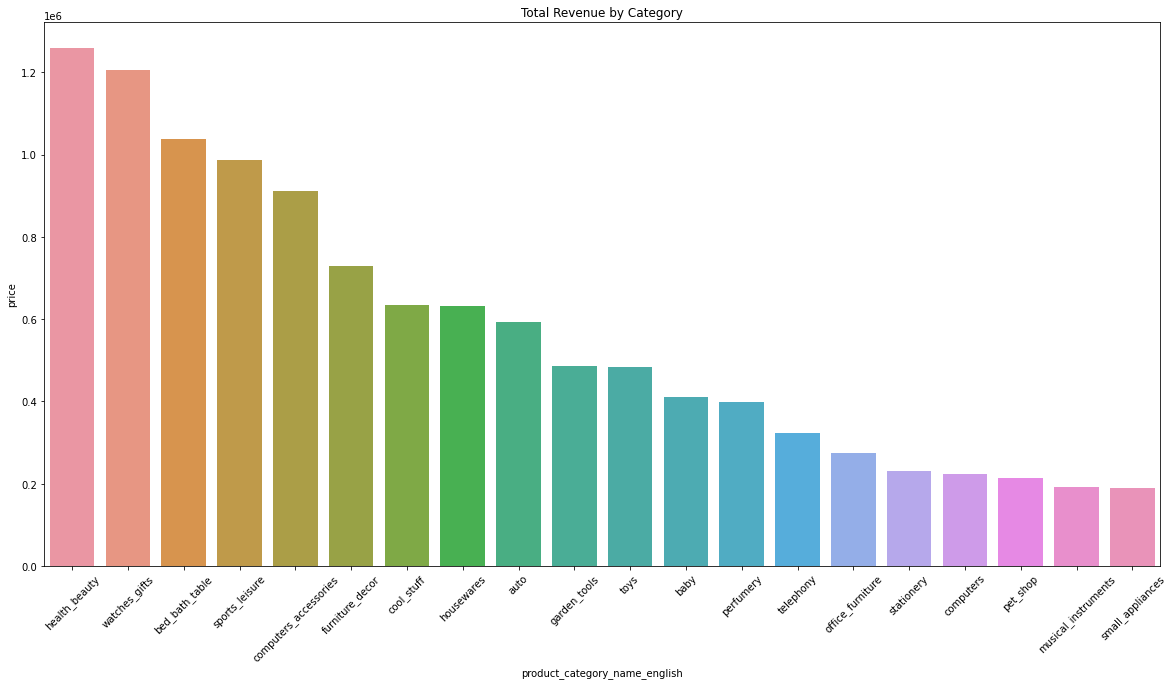

In [51]:
plt.figure(figsize=(20,10))
plt.title("Total Revenue by Category")
plot = sns.barplot(y="price", x = "product_category_name_english", data = cat_num.head(20))
plot.set_xticklabels(rotation=45, labels=list(cat_num.head(20)["product_category_name_english"]))


# **In Number**

In [49]:
cat_nums = order_product_merge.groupby("product_category_name_english").count()
cat_nums.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name_english,,,,,,,,,,,,,,,
agro_industry_and_commerce,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
air_conditioning,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297
art,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
arts_and_craftmanship,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
audio,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364


In [50]:
cat_nums.sort_values("product_id", ascending=False, inplace=True)
cat_nums.reset_index(inplace=True)
cat_nums.head()

,product_category_name_english,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,bed_bath_table,11115,11115,11115,11115,11115,11115,11115,11115,11115,11115,11115,11115,11115,11115,11115
1,health_beauty,9670,9670,9670,9670,9670,9670,9670,9670,9670,9670,9670,9670,9670,9670,9670
2,sports_leisure,8641,8641,8641,8641,8641,8641,8641,8641,8641,8641,8641,8641,8641,8641,8641
3,furniture_decor,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334
4,computers_accessories,7827,7827,7827,7827,7827,7827,7827,7827,7827,7827,7827,7827,7827,7827,7827


[Text(0, 0, 'bed_bath_table'),
 Text(0, 0, 'health_beauty'),
 Text(0, 0, 'sports_leisure'),
 Text(0, 0, 'furniture_decor'),
 Text(0, 0, 'computers_accessories'),
 Text(0, 0, 'housewares'),
 Text(0, 0, 'watches_gifts'),
 Text(0, 0, 'telephony'),
 Text(0, 0, 'garden_tools'),
 Text(0, 0, 'auto'),
 Text(0, 0, 'toys'),
 Text(0, 0, 'cool_stuff'),
 Text(0, 0, 'perfumery'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'electronics'),
 Text(0, 0, 'stationery'),
 Text(0, 0, 'fashion_bags_accessories'),
 Text(0, 0, 'pet_shop'),
 Text(0, 0, 'office_furniture'),
 Text(0, 0, 'consoles_games')]

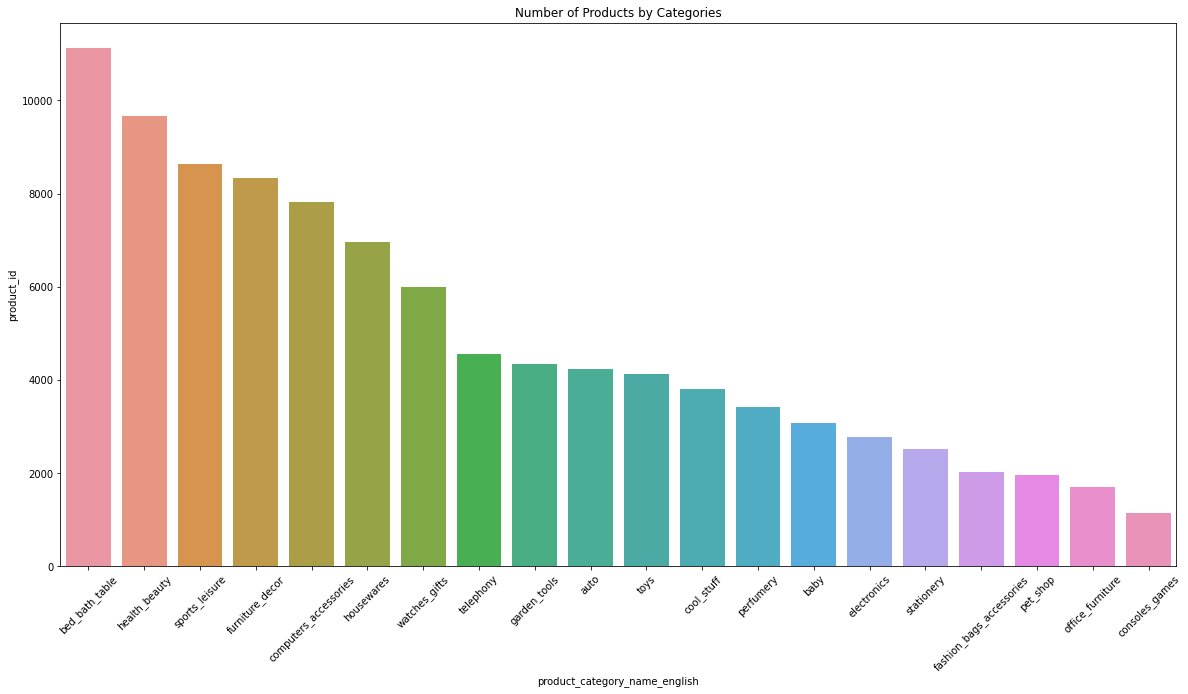

In [54]:
plt.figure(figsize=(20,10))
plt.title("Number of Products by Categories")
plot = sns.barplot(y="product_id", x="product_category_name_english", data=cat_nums.head(20))
plot.set_xticklabels(rotation=45, labels = list(cat_nums.head(20)["product_category_name_english"]))

# **How is the rating by Categories**

In [55]:
review_item_cat_merge = review_item_merge.merge(olist_products, on="product_id", how="inner")
review_item_cat_merge = review_item_cat_merge.merge(product_category_name, on="product_category_name", how="inner")
review_item_cat_merge.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.0,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.0,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-04-02 11:15:38,185.0,20.26,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2017-12-14 20:51:05,185.0,17.05,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.0,134.25,esporte_lazer,48.0,562.0,5.0,9850.0,105.0,35.0,50.0,sports_leisure


In [61]:
# Take only top-20 categories with highest revenue
popular_categories = list(cat_num["product_category_name_english"].head(20))
pop_review_item_cat_merge = review_item_cat_merge[review_item_cat_merge["product_category_name_english"].isin(popular_categories)]

[Text(0, 0, 'health_beauty'),
 Text(0, 0, 'watches_gifts'),
 Text(0, 0, 'bed_bath_table'),
 Text(0, 0, 'sports_leisure'),
 Text(0, 0, 'computers_accessories'),
 Text(0, 0, 'furniture_decor'),
 Text(0, 0, 'cool_stuff'),
 Text(0, 0, 'housewares'),
 Text(0, 0, 'auto'),
 Text(0, 0, 'garden_tools'),
 Text(0, 0, 'toys'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'perfumery'),
 Text(0, 0, 'telephony'),
 Text(0, 0, 'office_furniture'),
 Text(0, 0, 'stationery'),
 Text(0, 0, 'computers'),
 Text(0, 0, 'pet_shop'),
 Text(0, 0, 'musical_instruments'),
 Text(0, 0, 'small_appliances')]

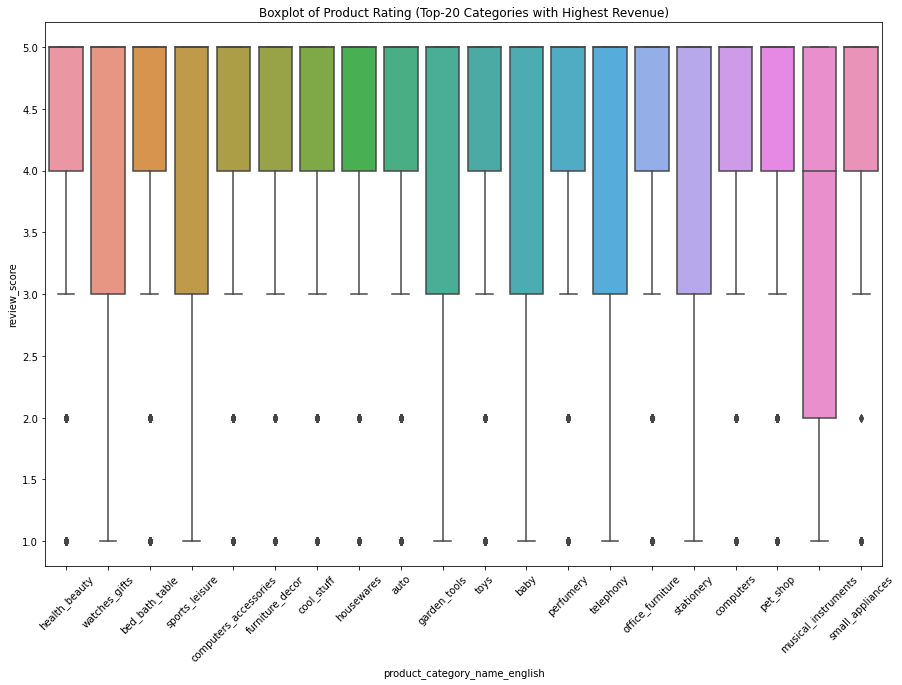

In [63]:
plt.figure(figsize=(15,10))
plt.title("Boxplot of Product Rating (Top-20 Categories with Highest Revenue)")
plot = sns.boxplot(x="product_category_name_english", y = "review_score", data=pop_review_item_cat_merge)
plot.set_xticklabels(rotation=45, labels=popular_categories)

Based on the data, we could give an insight to stakeholder that we have to evaluate musical instrument product because they have a value less than another product categories.

# **Where do our customers live?**

In [64]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [69]:
customer_count = olist_customers.groupby("customer_city").count()
customer_count

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
abadia dos dourados,3,3,3,3
abadiania,1,1,1,1
abaete,12,12,12,12
abaetetuba,11,11,11,11
abaiara,2,2,2,2
...,...,...,...,...
xinguara,9,9,9,9
xique-xique,3,3,3,3
zacarias,2,2,2,2


In [70]:
customer_count.reset_index(inplace=True)
customer_count.head()

,customer_city,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
0,abadia dos dourados,3,3,3,3
1,abadiania,1,1,1,1
2,abaete,12,12,12,12
3,abaetetuba,11,11,11,11
4,abaiara,2,2,2,2


In [73]:
customer_count.sort_values("customer_unique_id", ascending=False, inplace=True)
customer_count.head()

,customer_city,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
3597,sao paulo,15540,15540,15540,15540
3155,rio de janeiro,6882,6882,6882,6882
453,belo horizonte,2773,2773,2773,2773
558,brasilia,2131,2131,2131,2131
1143,curitiba,1521,1521,1521,1521


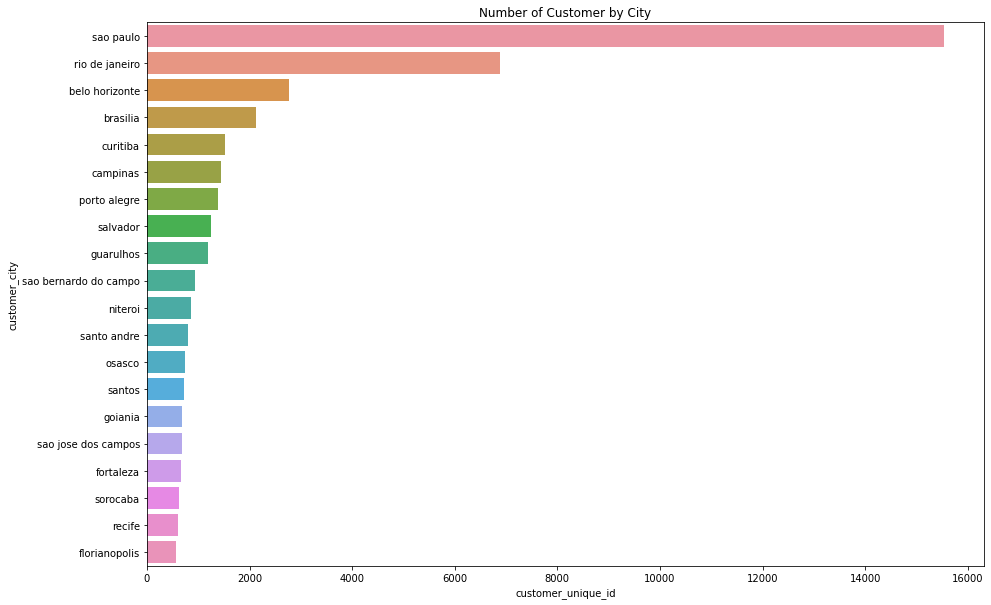

In [80]:
plt.figure(figsize=(15,10))
plt.title("Number of Customer by City")
sns.barplot(x="customer_unique_id", y="customer_city",orient="h",  data=customer_count.head(20))